In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

2.5.0


In [4]:
fashion_mnist=tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, tes_labels)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 8s 2us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
#Explore dataset

train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [ ]:
#preprocessing

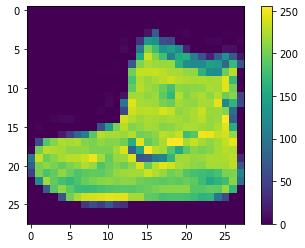

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images=train_images/255
test_images=test_images/255

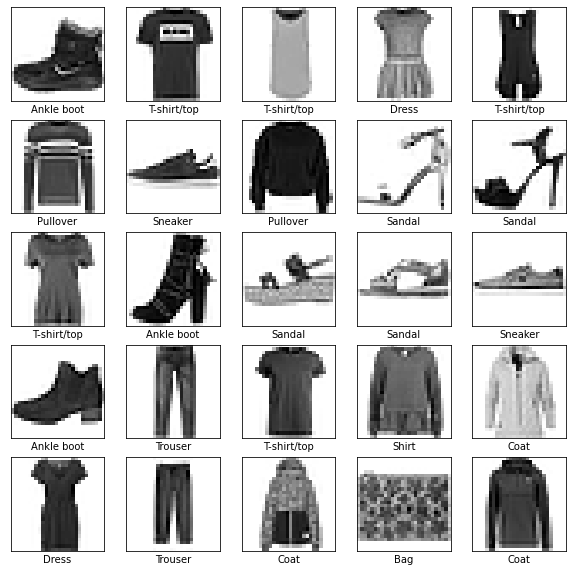

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    
plt.show()
    

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [15]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [19]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


C:\Users\Shivam\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


1875/1875 [==============================] - 23s 2ms/step - loss: 0.6313 - accuracy: 0.7805 0s - l
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3838 - accuracy: 0.8632
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3375 - accuracy: 0.8772
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3103 - accuracy: 0.8875
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2920 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2809 - accuracy: 0.8954: 0s - loss: 0.2809 - accuracy: 
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2698 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2597 - accuracy: 0.9037
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2445 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================

In [23]:
test_loss, test_acc = model.evaluate(test_images, tes_labels, verbose=2)

print('Test accuracy = {}'.format(test_acc))

313/313 - 0s - loss: 0.3308 - accuracy: 0.8836
Test accuracy = 0.8835999965667725


In [24]:
preds=model.predict(test_images)

In [25]:
preds[0]

array([1.15685644e-07, 3.15655529e-10, 2.25603269e-08, 2.85093782e-10,
       2.96179503e-09, 1.07001944e-03, 5.49612139e-07, 1.15275746e-02,
       1.10749798e-09, 9.87401783e-01], dtype=float32)

In [26]:
np.argmax(preds[0])

9

In [27]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label=np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
    
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')    
    
    

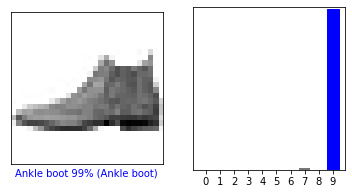

In [29]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, preds[i], tes_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, preds[i],  tes_labels)
plt.show()

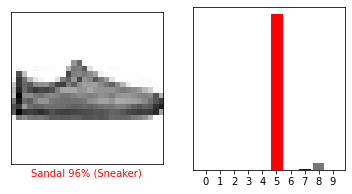

In [30]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, preds[i], tes_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, preds[i],  tes_labels)
plt.show()

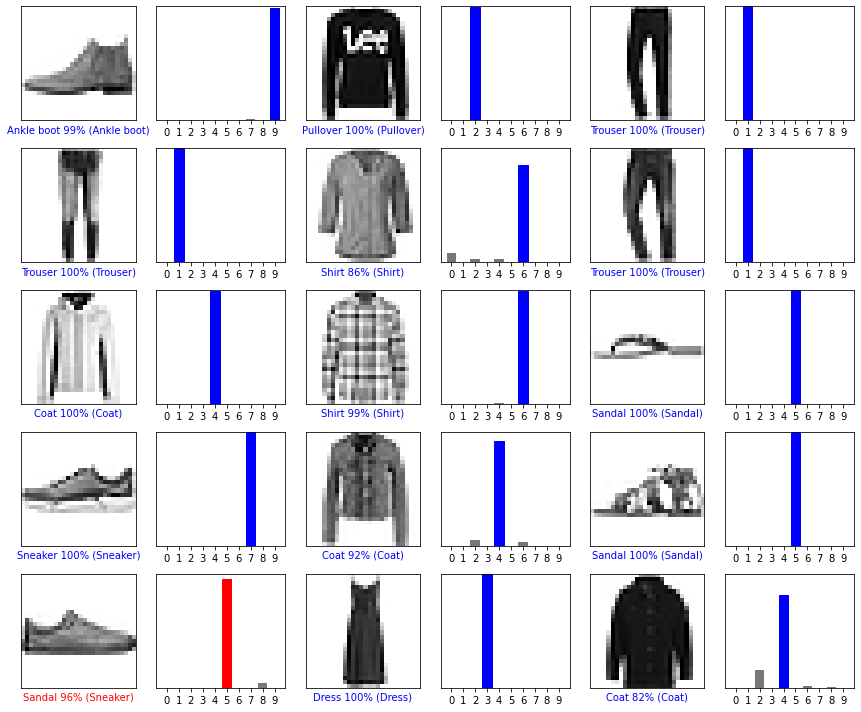

In [31]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, preds[i], tes_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, preds[i], tes_labels)
plt.tight_layout()
plt.show()

In [32]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [33]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [34]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.4892596e-04 6.7875900e-12 9.9886394e-01 1.2132011e-11 6.5320689e-04
  9.6199715e-12 2.3396299e-04 5.3157901e-14 2.2156088e-10 4.7098268e-17]]


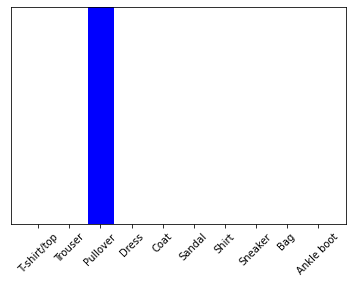

In [35]:
plot_value_array(1, predictions_single[0], tes_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [36]:
np.argmax(predictions_single[0])

2